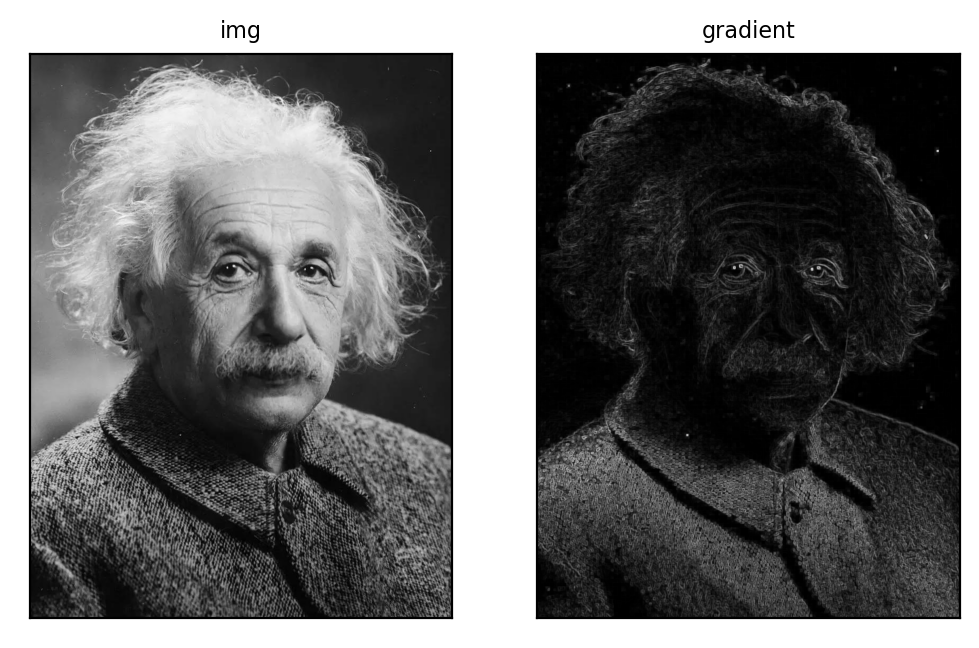

In [64]:
#形态学梯度：膨胀图减去腐蚀图，dilation - erosion，这样会得到物体的轮廓
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt #最后两个库为了画子图使用
def cv_imread(file_path):
    cv_img = cv2.imdecode(np.fromfile(file_path, dtype=np.uint8), cv2.IMREAD_COLOR)#utf-8编码读取 彩色图像
    return cv_img

# img = cv2.imread('平什么阿.png') #读取图片
img = cv_imread('爱因斯坦.jpg') 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # 矩形结构 3x3

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
titles = ['img', 'gradient']
images = [img, gradient]
plt.figure(dpi=200) #指定输出像素大小
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()


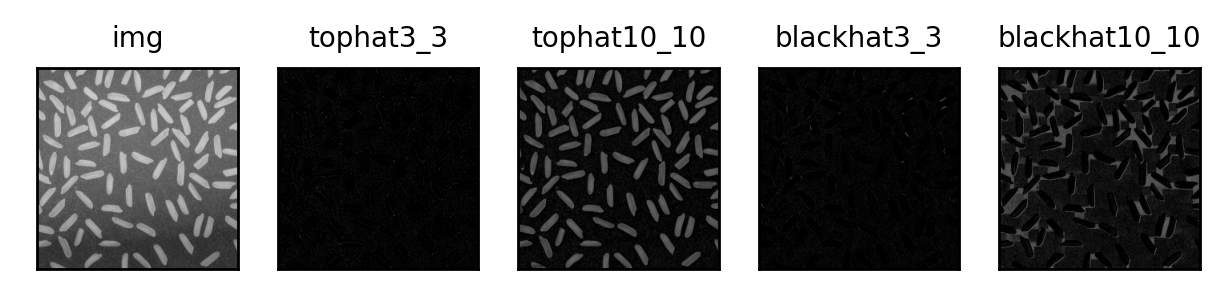

In [57]:
#顶帽：原图减去开运算后的图：src - opening
# img = cv2.imread('j_noise_out.bmp')
img = cv_imread('顶帽变换.png') 
# print(img)
kernel3_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))# 定义结构元素
kernel10_10 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))# 定义结构元素
tophat3_3 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel3_3)
tophat10_10 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel10_10)
blackhat3_3 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel3_3)
blackhat10_10 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel10_10)
# print('---------------',tophat)
titles = ['img', 'tophat3_3', 'tophat10_10', 'blackhat3_3','blackhat10_10']
images = [img, tophat3_3, tophat10_10, blackhat3_3, blackhat10_10]
plt.figure(dpi=250) #指定输出像素大小
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()


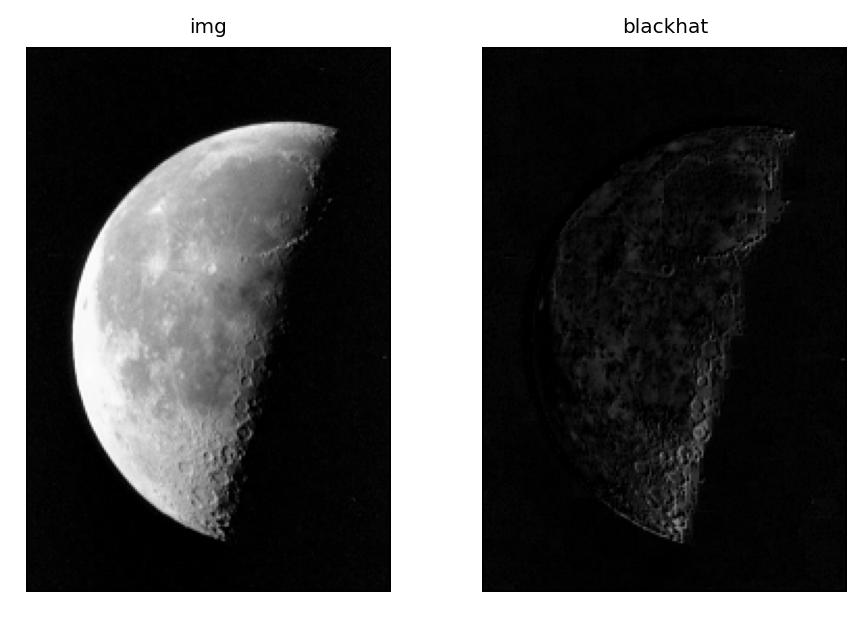

In [51]:
#黑帽：闭运算后的图减去原图：closing - src
# img = cv2.imread('j_noise_in.bmp')
img = cv_imread('黑帽变换.png') 
# print(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
# print('---------------------',blackhat)
titles = ['img', 'blackhat']
images = [img, blackhat]
plt.figure(dpi=180) #指定输出像素大小
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

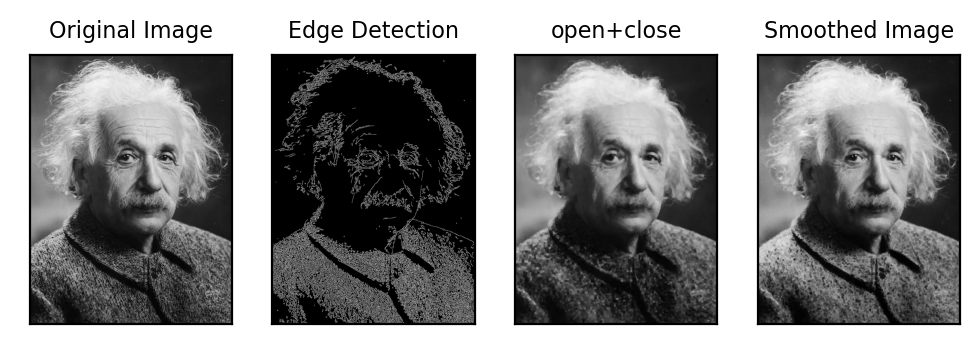

In [54]:
img = cv_imread('爱因斯坦.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 边界提取
edges = cv2.Canny(gray, 100, 200)

# # 形态学平滑
kernel = np.ones((5, 5), np.uint8)
smoothed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)#这是闭运算 而不是平滑运算 opencv 只提供了腐蚀、膨胀、开运算、闭运算、形态学梯度、顶帽、黑帽


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # 定义结构元素 5x5矩形结构
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)  # 开运算
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)  # 闭运算



titles = ['Original Image', 'Edge Detection','open+close','Smoothed Image']
images = [img, edges, closing, smoothed]

plt.figure(dpi=200)
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')  # 使用灰度图显示
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])

plt.show()

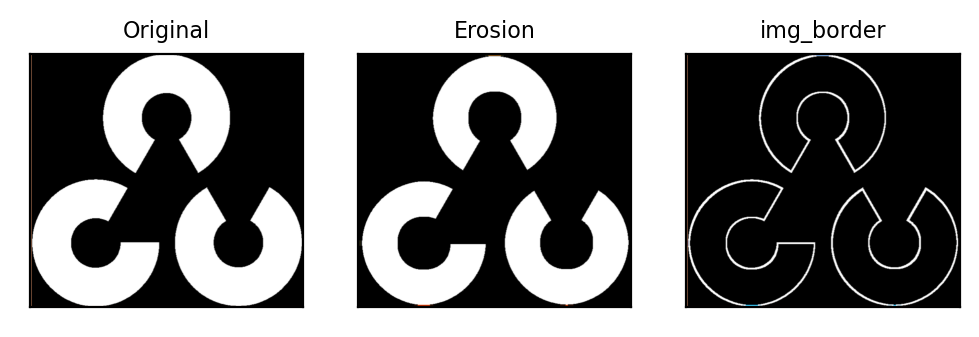

In [62]:
img = cv_imread('边界提取.png') 
# kernel = np.ones((25, 25), np.uint8)    # 矩形结构
# kernel = np.ones((5, 5), np.uint8)    # 矩形结构

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # 矩形结构
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # 椭圆结构
erosion = cv2.erode(img, kernel)   # 腐蚀
img_border = img-erosion
titles = ['Original', 'Erosion', 'img_border']
images = [img, erosion, img_border]
plt.figure(dpi=200) #指定输出像素大小
for i in range(3):
    plt.subplot(1,3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()